### Importing necessary libraries

In [1]:
import numpy as pd
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

### Reading the dataset

In [2]:
newspaper = pd.read_csv("NewspaperData.csv")
newspaper.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
newspaper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


### Correlation

In [4]:
newspaper.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


### Visualizing the data

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

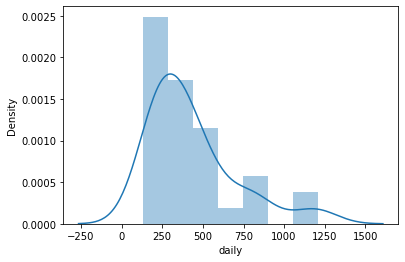

In [5]:
sns.distplot(newspaper['daily'])

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

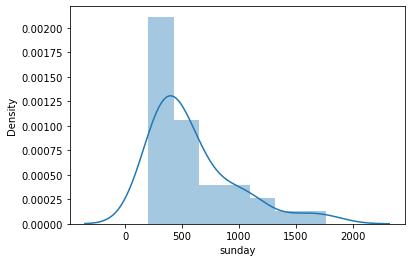

In [6]:
sns.distplot(newspaper['sunday'])

 ### Fitting a regression model

In [7]:
model = smf.ols('sunday~daily',data = newspaper).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

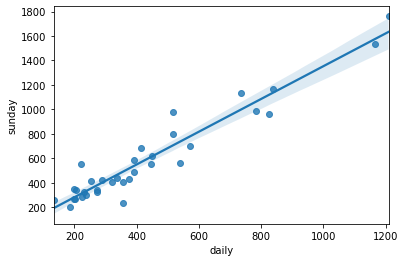

In [8]:
sns.regplot(x = 'daily', y = 'sunday', data = newspaper)

### Coefficients

In [9]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

### t-values and p-values

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


### r squared values

In [11]:
(model.rsquared , model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

### Predict for new data points 

In [12]:
# predict for 200 and 300 daily circulation
newdata = pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [13]:
data_pred = pd.DataFrame(newdata, columns = ['daily'])

In [14]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [15]:
13.835630 + 1.339715 * 200

281.77862999999996

In [16]:
13.835630 + 1.339715 * 300

415.75012999999996

In [17]:
newspaper['Predicted'] = model.fittedvalues
newspaper

,Newspaper,daily,sunday,Predicted
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [18]:
newspaper['Error'] = newspaper['sunday'] - newspaper['Predicted']
newspaper

,Newspaper,daily,sunday,Predicted,Error
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [19]:
model.resid

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
dtype: float64